### Packages Required

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
import scipy.stats as stats
import pandas_profiling
from sklearn.cluster import KMeans,DBSCAN
from scipy.cluster import hierarchy
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA

### Datasets

In [7]:
df = pd.read_csv('C:/Users/Nithin/Downloads/Segementation_Scientific/turkiye-student-evaluation_generic.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5820 entries, 0 to 5819
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   instr       5820 non-null   int64
 1   class       5820 non-null   int64
 2   nb.repeat   5820 non-null   int64
 3   attendance  5820 non-null   int64
 4   difficulty  5820 non-null   int64
 5   Q1          5820 non-null   int64
 6   Q2          5820 non-null   int64
 7   Q3          5820 non-null   int64
 8   Q4          5820 non-null   int64
 9   Q5          5820 non-null   int64
 10  Q6          5820 non-null   int64
 11  Q7          5820 non-null   int64
 12  Q8          5820 non-null   int64
 13  Q9          5820 non-null   int64
 14  Q10         5820 non-null   int64
 15  Q11         5820 non-null   int64
 16  Q12         5820 non-null   int64
 17  Q13         5820 non-null   int64
 18  Q14         5820 non-null   int64
 19  Q15         5820 non-null   int64
 20  Q16         5820 non-null   in

<AxesSubplot:>

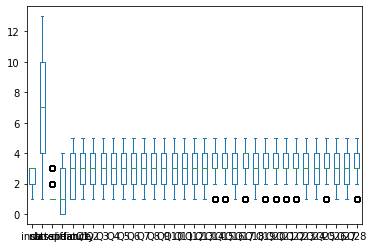

In [19]:
#Outlier
df.plot(kind='box')

In [20]:
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.95))
    x = x.clip(lower=x.quantile(0.05))
    return x

In [21]:
df = df.apply(lambda x : outlier_capping(x))

<AxesSubplot:>

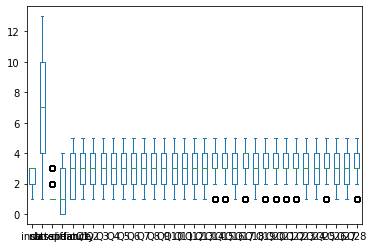

In [22]:
df.plot(kind='box')

### Standardisation of data

In [24]:
sc = StandardScaler()

sc_model = sc.fit(df)
df_scale = sc_model.transform(df)
df_scale = pd.DataFrame(df_scale,columns=list(df.columns))
df_scale

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,-2.06785,-1.430719,-0.402174,-1.136118,0.901862,0.052278,-0.057490,-0.142561,-0.064208,-0.082761,...,-0.206321,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948
1,-2.06785,-1.430719,-0.402174,-0.458082,0.160501,0.052278,-0.057490,-0.142561,-0.064208,-0.082761,...,-0.206321,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948
2,-2.06785,-1.430719,-0.402174,0.219954,0.901862,1.543745,1.498760,1.453023,1.492837,1.481107,...,1.370552,1.342957,1.332907,1.326612,1.413075,1.436873,1.342258,1.399225,1.428430,1.323265
3,-2.06785,-1.430719,-0.402174,-0.458082,0.160501,0.052278,-0.057490,-0.142561,-0.064208,-0.082761,...,-0.206321,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948
4,-2.06785,-1.430719,-0.402174,-1.136118,-1.322221,-1.439189,-1.613740,-1.738145,-1.621254,-1.646630,...,-1.783194,-1.790026,-1.817034,-1.827343,-1.730392,-1.698417,-1.839472,-1.748929,-1.668120,-1.805160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5815,0.71607,1.552042,-0.402174,-1.136118,-1.322221,-1.439189,-1.613740,-1.738145,-1.621254,-1.646630,...,-1.783194,-1.790026,-1.817034,-1.827343,-1.730392,-1.698417,-1.839472,-1.748929,-1.668120,-1.805160
5816,0.71607,1.552042,-0.402174,0.897990,0.901862,0.798012,0.720635,0.655231,0.714315,0.699173,...,1.370552,1.342957,1.332907,1.326612,0.627208,1.436873,1.342258,1.399225,1.428430,1.323265
5817,0.71607,1.552042,-0.402174,-1.136118,0.901862,1.543745,1.498760,1.453023,1.492837,1.481107,...,1.370552,1.342957,1.332907,1.326612,1.413075,1.436873,1.342258,1.399225,1.428430,1.323265
5818,0.71607,1.552042,-0.402174,-0.458082,-0.580860,-1.439189,-1.613740,-1.738145,-1.621254,-1.646630,...,-1.783194,-1.790026,-1.817034,-1.827343,-1.730392,-1.698417,-1.839472,-1.748929,-1.668120,-1.805160


### DBSCAN

In [31]:
dbs = DBSCAN(eps=2.1,min_samples=5)
dbs = dbs.fit(df_scale)
dbs_labels = pd.Series(dbs.labels_)

In [32]:
round(dbs_labels.value_counts().sort_index()/len(df_scale)*100,2)

-1    34.14
 0    19.18
 1    11.86
 2    10.86
 3    18.35
 4     5.33
 5     0.29
dtype: float64

In [33]:
df['DBSCAN_labels'] = dbs_labels

In [36]:
df2 = df[df.DBSCAN_labels != -1]
df2

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,DBSCAN_labels
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,0
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,0
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,1
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,0
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5815,3,13,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,2
5816,3,13,1,3,4,4,4,4,4,4,...,5,5,5,4,5,5,5,5,5,1
5817,3,13,1,0,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,1
5818,3,13,1,1,2,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,2
